# Día 2

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

# Compuertas controladas

De acuerdo al estado de un qubit control, podemos controlar cualquier otra compuerta.
También, pueden ser personalizadas.

# Estados multi-qubit

> La dimensión del espacio de Hilbert para $n$ qubits está dado por $2^n$. Para obtenerlo se usa el **producto tensorial** (o *[producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product)*).

Aplicar $n$ Hadamards a $n$ qubits: $$H_n \, \underbrace{\ket{0...0}}_{n~qubits}$$
$$\underbrace{H\otimes\cdots\otimes H}_{n~veces}=\bigotimes_1^n H=H^{\otimes n}=H_n$$

# Producto tensorial

> Permite unir espacios de qubits

# Estados de Bell

> Estados máximamente entrealazados

<dt>Entrelazados</dt>
<dd>El estado no puede ser separado en el producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$.</dd>

$$\ket{\Phi^+}=\frac{1}{\sqrt2}\Big(\ket{00}+\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ 1 }$$

$$~~~\ket{\Phi^-}=\frac{1}{\sqrt2}\Big(\ket{00}-\ket{11}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 1 \\ 0 \\ 0 \\ -1 }$$

$$\ket{\Psi^+}=\frac{1}{\sqrt2}\Big(\ket{01}+\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ 1 \\ 0 }$$

$$~~~\ket{\Psi^-}=\frac{1}{\sqrt2}\Big(\ket{01}-\ket{10}\Big)=\frac{1}{\sqrt2}\mymatrix{r}{ 0 \\ 1 \\ -1 \\ 0 }$$

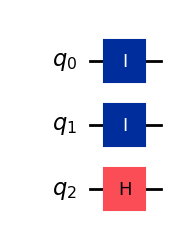

<IPython.core.display.Latex object>

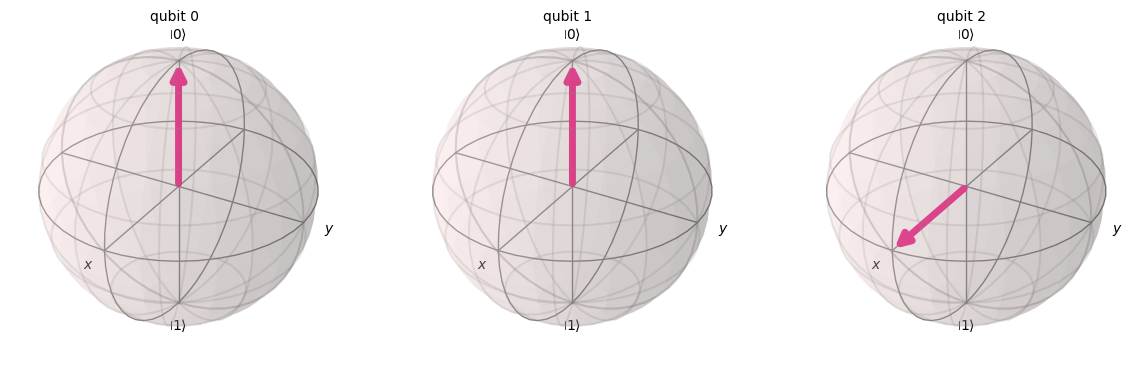

In [8]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_bloch_multivector

c = QuantumCircuit(3)

#c.h(0)
#c.id(1)
#c.id(2)

c.id(0)
c.id(1)
c.h(2)
#c.p(np.pi/3,2)

#c.id(0)
#c.cx(1,2)
#c.ccx(0,1,2)

display(c.draw('mpl'))

op = Operator(c)
display(array_to_latex(op))

psi = Statevector(c)
display(plot_bloch_multivector(psi))

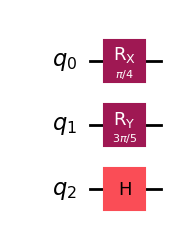

<IPython.core.display.Latex object>

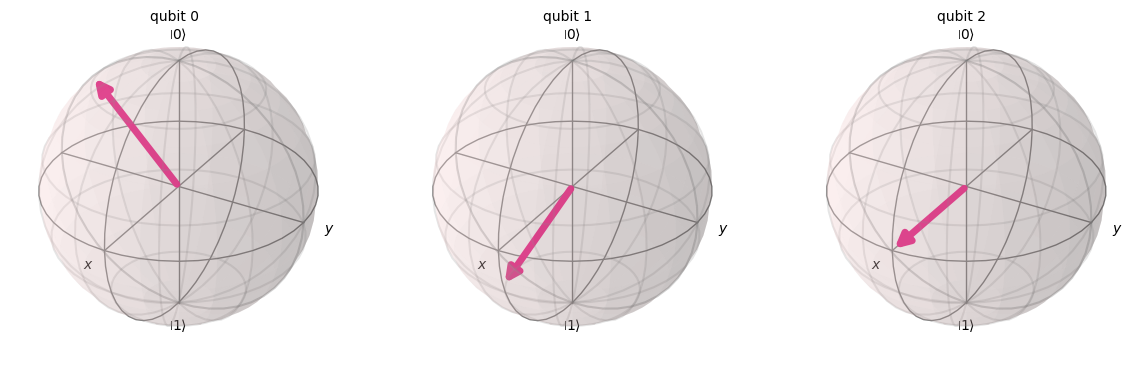

In [9]:
import numpy as np

circuit = QuantumCircuit(3) # circuito con 3 qubits

circuit.rx(np.pi/4, 0)      # Rx de pi/4  al q0
circuit.ry(3*np.pi/5, 1)    # Ry de 3pi/5 al q1
circuit.h(2)                # Hadamard al q2

display(circuit.draw('mpl'))

op = Operator(circuit)
display(array_to_latex(op))

psi = Statevector(circuit)

print()
display(plot_bloch_multivector(psi))

# UnitaryGate

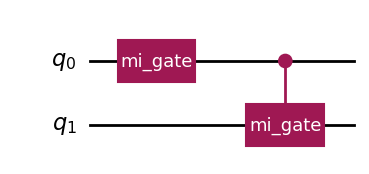

In [10]:
from qiskit.circuit.library import UnitaryGate

matrix = [[1j, 0],
          [0 , 1,]]

mi_gate = UnitaryGate(matrix, 'mi_gate')

circ10 = QuantumCircuit(2)      # circuito con 2 qubits

circ10.append(mi_gate, [0])     # le agregamos al circuito la compuerta personalizada


mi_gate_controlada = mi_gate.control(1)   # hacemos la version controlada de mi_gate

circ10.append(mi_gate_controlada, [0, 1]) # se indican los qubits, primero el control y luego el objetivo


display(circ10.draw('mpl'))

# Compuertas personalizadas

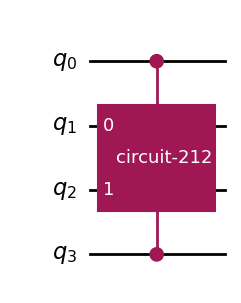

In [11]:
# Crear una compuerta a partir de un circuito
qc1 = QuantumCircuit(2)
# estos dos qubits serán los objetivos
qc1.x(0)
qc1.h(1)
custom = qc1.to_gate().control(2) # se indica que debe ser controlada con dos qubits

# Aplicar esa compuerta a otro circuito
qc2 = QuantumCircuit(4)
qc2.append(custom, [0, 3, 1, 2]) # primeros 2 son control, el resto a los que se aplica la compuerta
qc2.draw('mpl')

# Estados de Bell

En la esfera de Bloch, esto debido a que los estados están entrelazados y por lo tanto no podemos tener una representación con producto tensorial de dos qubits como $\ket{a}\otimes\ket{b}$, al no existir $\ket{a}$ o $\ket{b}$, no tenemos vectores que puedan ser dibujados sobre esferas de Bloch.

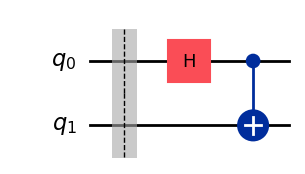

👉 Estado de Bell 1:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [16]:
circ_bell_1 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_1.barrier()
circ_bell_1.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_1.cx(0,1)                # aplicar compuerta CNOT

psi_bell_1 = Statevector(circ_bell_1)   # estado final

display(circ_bell_1.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 1:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_1))
print("➤ en forma de ket:")
display(psi_bell_1.draw('latex'))

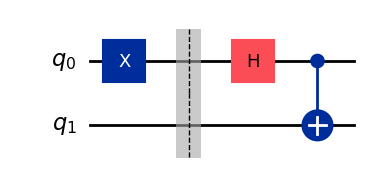

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [13]:
circ_bell_2 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_2.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_2.barrier()
circ_bell_2.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_2.cx(0,1)                # aplicar compuerta CNOT

psi_bell_2 = Statevector(circ_bell_2)   # estado final

display(circ_bell_2.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_2))
print("➤ en forma de ket:")
display(psi_bell_2.draw('latex'))

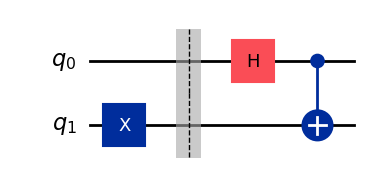

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [14]:
circ_bell_3 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_3.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_3.barrier()
circ_bell_3.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_3.cx(0,1)                # aplicar compuerta CNOT

psi_bell_3 = Statevector(circ_bell_3)   # estado final

display(circ_bell_3.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_3))
print("➤ en forma de ket:")
display(psi_bell_3.draw('latex'))

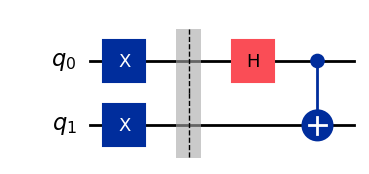

👉 Estado de Bell 2:
➤ en forma de vector:


<IPython.core.display.Latex object>

➤ en forma de ket:


<IPython.core.display.Latex object>

In [15]:
circ_bell_4 = QuantumCircuit(2)    # circuito con 2 qubits

circ_bell_4.x(0)                   # aplicar compuerta X al qubit 0
circ_bell_4.x(1)                   # aplicar compuerta X al qubit 1
circ_bell_4.barrier()
circ_bell_4.h(0)                   # aplicar compuerta H al qubit 0
circ_bell_4.cx(0,1)                # aplicar compuerta CNOT

psi_bell_4 = Statevector(circ_bell_4)   # estado final

display(circ_bell_4.draw('mpl'))   # mostrar el circuito

print("👉 Estado de Bell 2:")
print("➤ en forma de vector:")
display(array_to_latex(psi_bell_4))
print("➤ en forma de ket:")
display(psi_bell_4.draw('latex'))

# QSphere

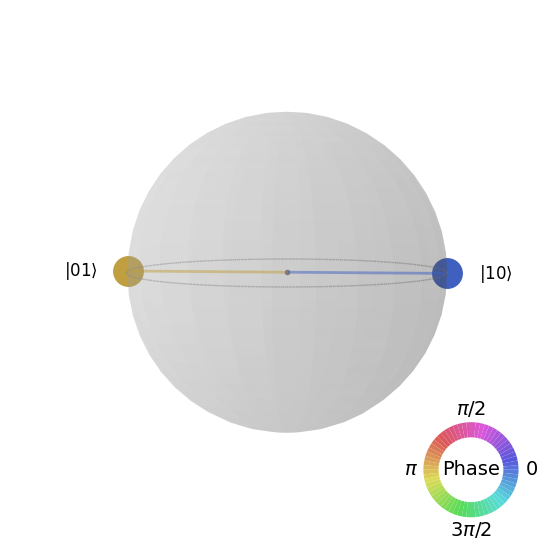

In [18]:
psi_bell_4.draw('qsphere')